# 교차 검증
- test set에만 잘 동작하는 모델이 되지 않도록 하는 과정
- 학습 상태를 더 일반화한 지표가 되도록 조장할 수 있다. 

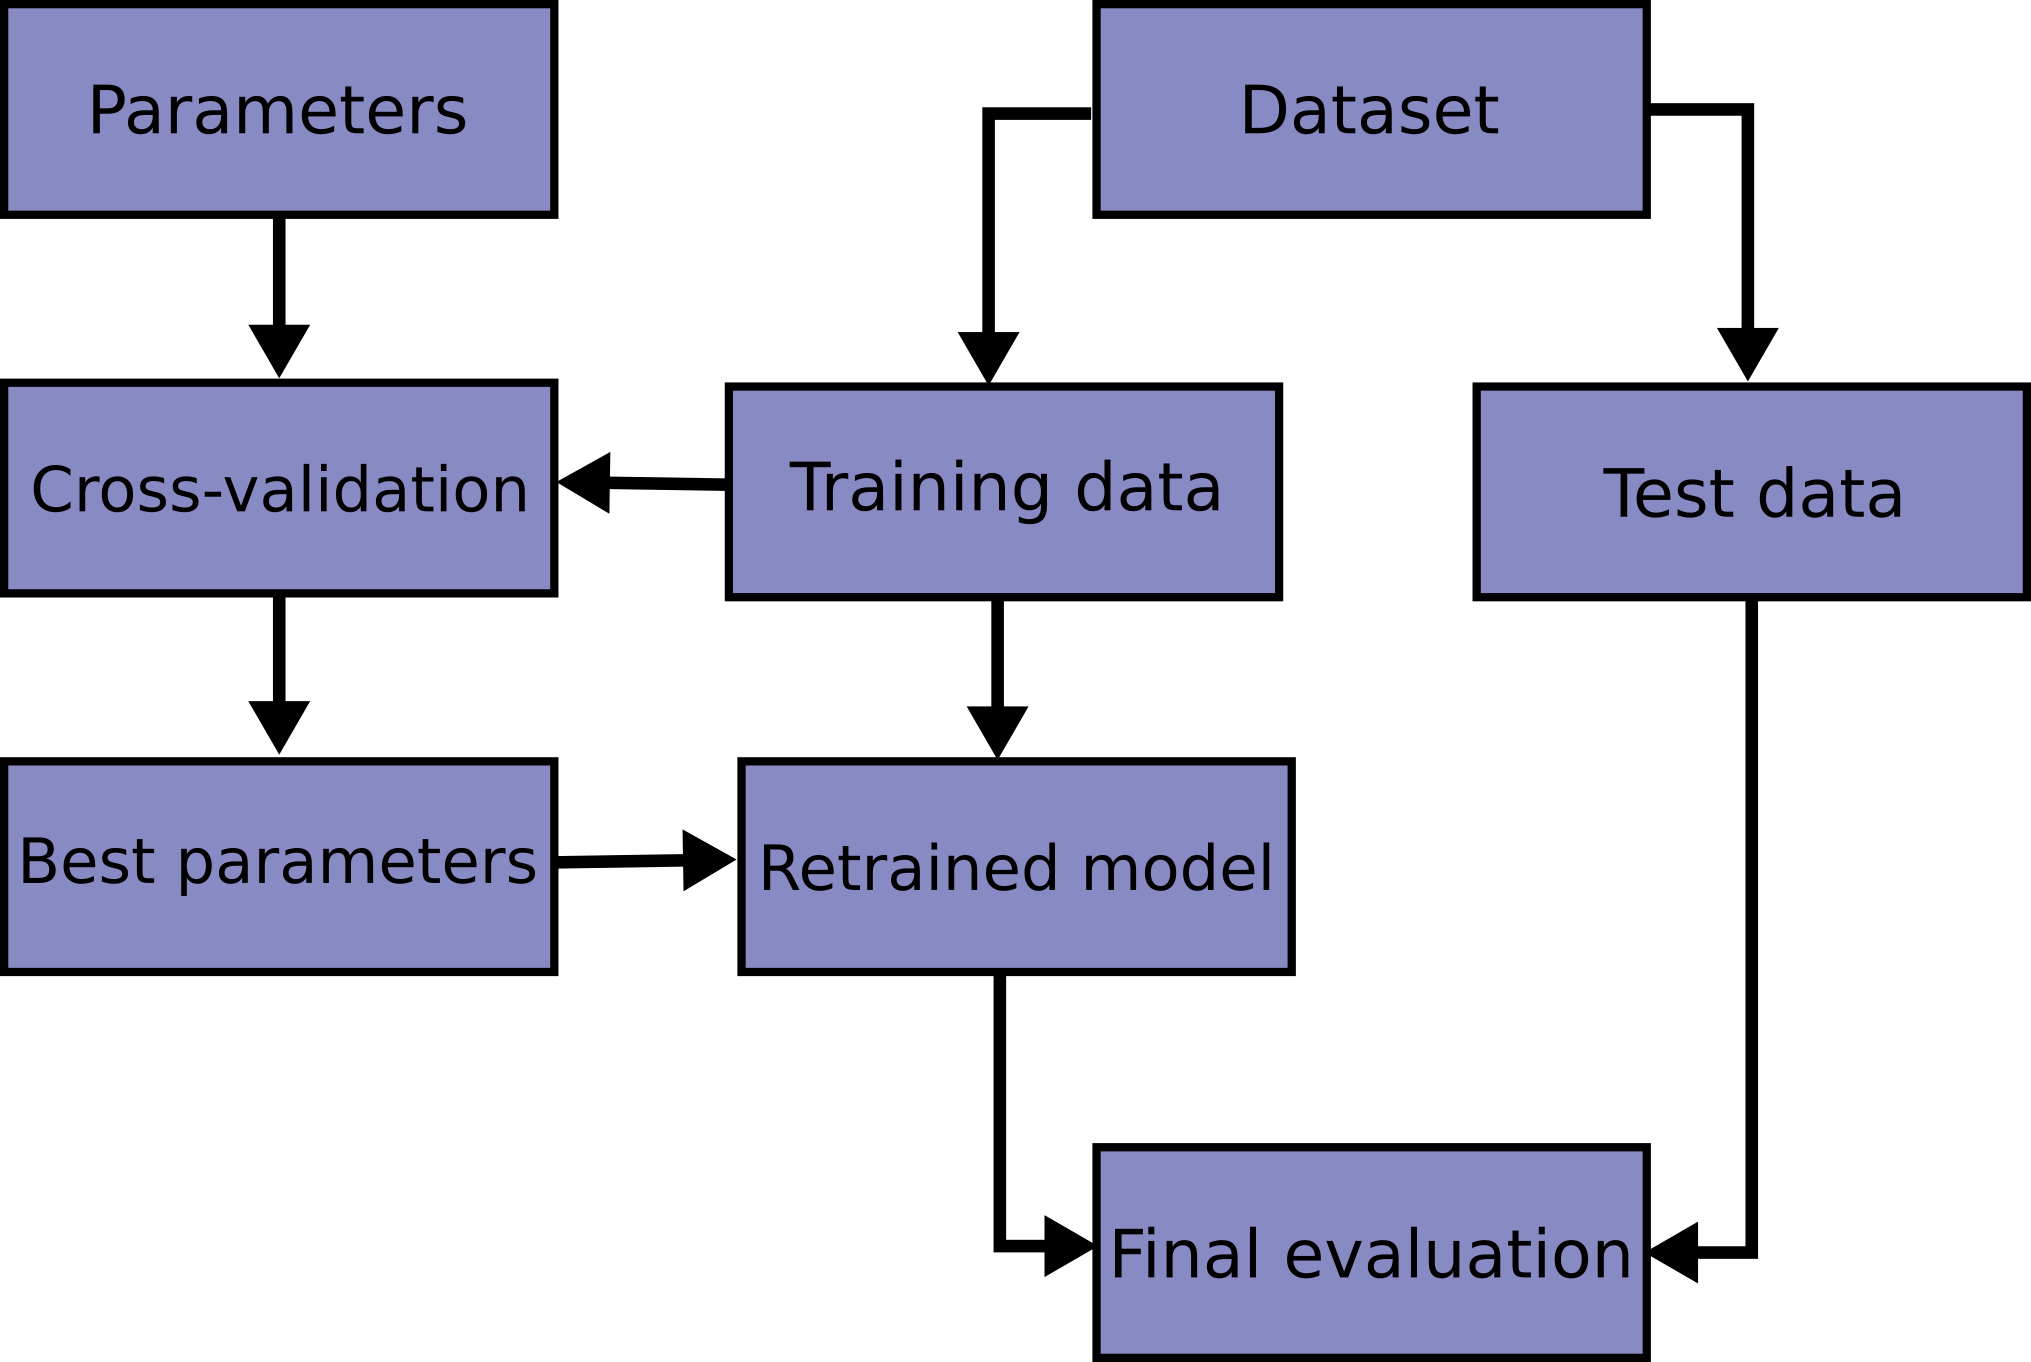

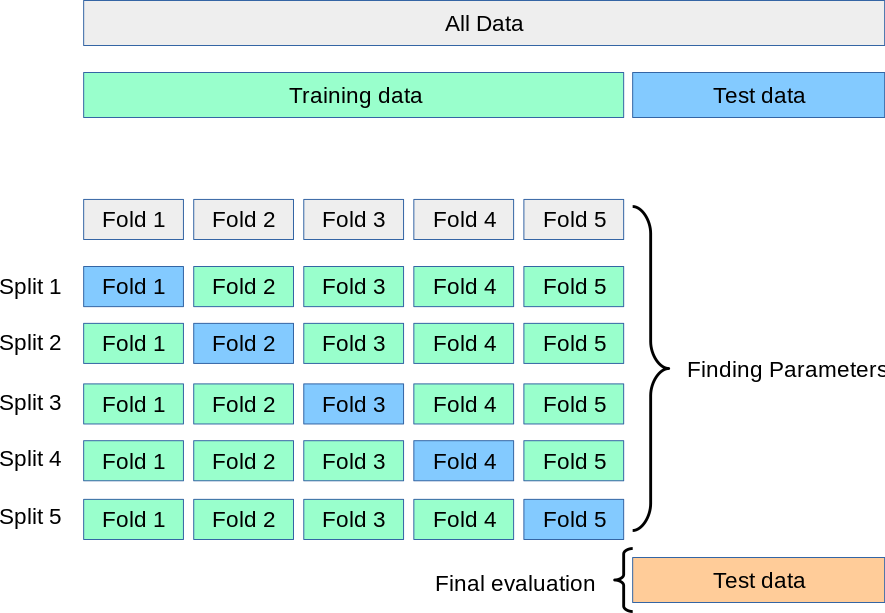

# 교차 검증 기법 종류

## k-fold cross validation

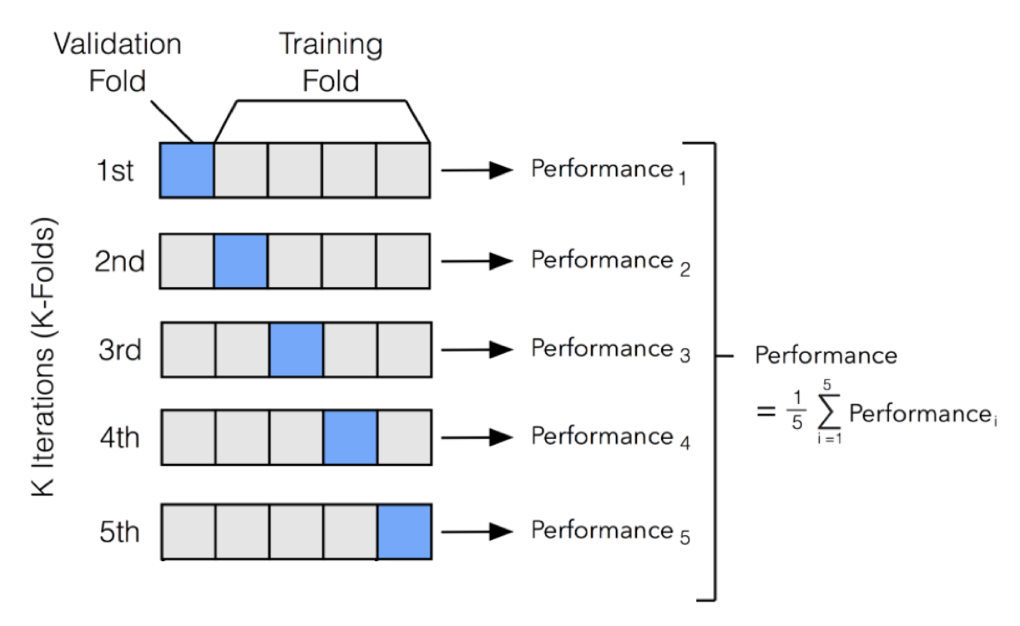

## Stratifieid k-fold cross validation

- class의 비율을 유지하면서 검증

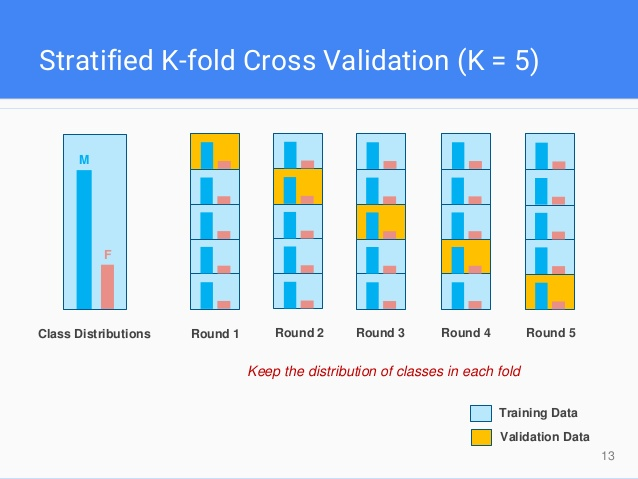

# 교차 검증 예제

## 데이터 분포

In [2]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import datasets

In [4]:
# 데이터 로드
iris  = datasets.load_iris()
X = iris.data
y = iris.target

X.shape, y.shape

((150, 4), (150,))

In [5]:
# train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [6]:
X_train.shape, y_train.shape

((90, 4), (90,))

In [7]:
X_test.shape, y_test.shape

((60, 4), (60,))

## 교차 검증을 사용하지 않은 예제

In [8]:
from sklearn import svm

In [11]:
# 모델 정의
clf = svm.SVC(kernel = 'linear', C=1)

# 모델 학습
clf.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [12]:
# 평가
clf.score(X_test, y_test)

0.9666666666666667

## 교차 검증을 사용한 예제

### K Fold
- 회귀 모델에 유용

In [13]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [14]:
# 모델 정의
clf = svm.SVC(kernel='linear', C=1)

In [15]:
# 교차 검증
kf = KFold(n_splits=5, shuffle=True, random_state=0)

In [22]:
for train_index, valid_index in kf.split(X_train) :
  print(train_index, valid_index)
  break

[ 0  1  3  4  5  6  9 10 11 12 14 15 17 18 19 20 21 22 23 25 27 28 29 31
 32 34 35 36 37 38 39 40 42 44 46 47 48 49 50 51 52 54 55 57 58 59 60 61
 62 64 65 67 68 69 70 71 72 73 74 75 76 77 79 80 81 82 83 84 85 86 87 88] [ 2  7  8 13 16 24 26 30 33 41 43 45 53 56 63 66 78 89]


In [24]:
X_train[train_index][:5]

array([[6. , 3.4, 4.5, 1.6],
       [4.8, 3.1, 1.6, 0.2],
       [5.6, 2.7, 4.2, 1.3],
       [5.6, 2.9, 3.6, 1.3],
       [5.5, 2.5, 4. , 1.3]])

In [27]:
n_iter=0
accuracy_lst = []

for train_index, valid_index in kf.split(X_train) :
  n_iter += 1

  # 학습용, 검증용 데이터 구성
  train_x , valid_x =X_train[train_index], X_train[valid_index]
  train_y, valid_y = y_train[train_index], y_train[valid_index]
  
  # 학습
  clf.fit(train_x, train_y)

  # 예측
  pred = clf.predict(valid_x)

  # 평가
  accuracy = np.round(accuracy_score(valid_y, pred), 4)
  accuracy_lst.append(accuracy)
  print(f'{n_iter}번째 k-fold 정확도 : {accuracy}, 학습 데이터 크기 : {train_x.shape}, 검증 데이터 크기 : {valid_x.shape}')

# 최종 평가
print('-' * 50)
print(f'교차 검증 정확도 : {np.mean(accuracy_lst)} / 모델 평가 : {clf.score(X_test, y_test)}')

1번째 k-fold 정확도 : 1.0, 학습 데이터 크기 : (72, 4), 검증 데이터 크기 : (18, 4)
2번째 k-fold 정확도 : 0.9444, 학습 데이터 크기 : (72, 4), 검증 데이터 크기 : (18, 4)
3번째 k-fold 정확도 : 0.9444, 학습 데이터 크기 : (72, 4), 검증 데이터 크기 : (18, 4)
4번째 k-fold 정확도 : 1.0, 학습 데이터 크기 : (72, 4), 검증 데이터 크기 : (18, 4)
5번째 k-fold 정확도 : 1.0, 학습 데이터 크기 : (72, 4), 검증 데이터 크기 : (18, 4)
--------------------------------------------------
교차 검증 정확도 : 0.9777600000000002 / 모델 평가 : 0.9666666666666667


### StratifiedKFold
- 분류 모델에 유용
- 중요!

In [28]:
from sklearn.model_selection import StratifiedKFold

In [29]:
import pandas as pd

In [30]:
df_train = pd.DataFrame(data=X_train, columns=iris.feature_names)
df_train['label'] = y_train
df_train.shape

(90, 5)

In [31]:
# 모델 정의
clf = svm.SVC(kernel='linear', C=1)

In [33]:
# 교차 검증
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [36]:
n_iter = 0
accuracy_list = []

# feature 정보를 같이 넣어줘야 한다. 비율을 유지하면서 쪼개야 하기 때문 
for trian_index, valid_index in skf.split(df_train, df_train['label']) :
  n_iter += 1

    # 학습용, 검증용 데이터 구성
  label_train = df_train['label'].iloc[train_index]
  label_valid = df_train['label'].iloc[valid_index]

  train_x, valid_x = X_train[train_index], X_train[valid_index]
  train_y,  valid_y = y_train[train_index], y_train[valid_index]

  # 학습
  clf.fit(X_train, y_train)

  # 예측 
  pred = clf.predict(valid_x)

  # 평가
  accuracy = np.round(accuracy_score(valid_y, pred), 4)
  accuracy_lst.append(accuracy)
  print(f'{n_iter} 번째 Stratified K Fold 정확도 : {accuracy}, 학습 데이터 label 분포 : {label_train.value_counts()}, 검증 데이터 label 분표 : {label_valid.value_counts()}')

  # 최종 평가
  print('-' * 50)
  print(f'교차 검증 정확도 : {np.mean(accuracy_lst)} / 모델 평가 : {clf.score(X_test,y_test )}')


1 번째 Stratified K Fold 정확도 : 1.0, 학습 데이터 label 분포 : 1    24
0    24
2    24
Name: label, dtype: int64, 검증 데이터 label 분표 : 0    7
1    6
2    5
Name: label, dtype: int64
--------------------------------------------------
교차 검증 정확도 : 0.9807538461538462 / 모델 평가 : 0.9666666666666667
2 번째 Stratified K Fold 정확도 : 1.0, 학습 데이터 label 분포 : 1    24
0    24
2    24
Name: label, dtype: int64, 검증 데이터 label 분표 : 1    6
0    6
2    6
Name: label, dtype: int64
--------------------------------------------------
교차 검증 정확도 : 0.9814666666666667 / 모델 평가 : 0.9666666666666667
3 번째 Stratified K Fold 정확도 : 1.0, 학습 데이터 label 분포 : 1    24
0    24
2    24
Name: label, dtype: int64, 검증 데이터 label 분표 : 0    7
2    6
1    5
Name: label, dtype: int64
--------------------------------------------------
교차 검증 정확도 : 0.9821285714285715 / 모델 평가 : 0.9666666666666667
4 번째 Stratified K Fold 정확도 : 0.9444, 학습 데이터 label 분포 : 1    24
0    24
2    24
Name: label, dtype: int64, 검증 데이터 label 분표 : 0    7
2    6
1    5
Name: label, dtype

### corss_val_predict()
  - 만든 모델을 통해 예측한 값들을 불러와 원하는 평가 계산 방법을 적용할 수 있도록 한다.
- 중간 과정을 지켜보기 어려워 간단하게 적용할 때 추천
- 잘 사용하지 않는 방식

In [37]:
from sklearn.model_selection import cross_val_predict

In [38]:
# 모델 정의
clf = svm.SVC(kernel='linear', C=1)

# 교차 검증
predicts = cross_val_predict(clf, X_train, y_train, cv=5)

# 학습이 끝난 예측 값까지 출력해준다  
print(f'각 예측 결과값 \n : {pd.Series(predicts)}')

각 예측 결과값 
 : 0     1
1     0
2     2
3     1
4     1
     ..
85    0
86    2
87    1
88    2
89    0
Length: 90, dtype: int64


### cross_val_score
- 평가 지표로 계산된 스코어에 대한 정보들을 확인하는 방법
- 많이 사용하는 방법

In [40]:
from sklearn.model_selection import cross_val_score

In [45]:
# 모델 정의
clf = svm.SVC(kernel='linear', C=1)

# 교차 검증, accuracy 대신 roc_auc 등으로 변경 가능 
scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
print(f'각 검증 별 점수 : \n{pd.Series(scores)}')
print(f'교차 검증 평균 점수 : \n{np.array(scores).mean()}')

각 검증 별 점수 : 
0    1.000000
1    1.000000
2    1.000000
3    1.000000
4    0.944444
dtype: float64
교차 검증 평균 점수 : 
0.9888888888888889


### cross_validation()
- 여러 개의 평가 지표를 사용하고 교차 검증

In [46]:
from sklearn.model_selection import cross_validate

In [48]:
# 모델 정의
clf = svm.SVC(kernel = 'linear', C=1)

# 교차 검증
result = cross_validate(clf, X_train, y_train, scoring='accuracy', cv=5, return_train_score=True)
print(f'각 검증 결과 : \n : {pd.DataFrame(result)}')

각 검증 결과 : 
 :    fit_time  score_time  test_score  train_score
0  0.011099    0.000862    1.000000     0.986111
1  0.003938    0.000761    1.000000     1.000000
2  0.001446    0.000811    1.000000     0.986111
3  0.001350    0.000632    1.000000     0.986111
4  0.001117    0.000589    0.944444     1.000000
